# Least Squares Example: Moving Average Model

Suppose we've been given a set of data representing a timeseries of inputs and outputs. We can load the data (which is in a .csv) and plot it to see how it behaves over time.

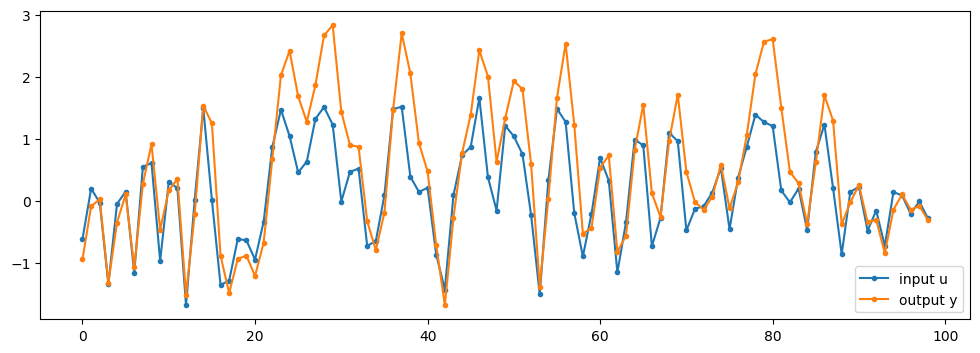

In [1]:
# Load the data file (ref: Boyd/263)
using CSV, DataFrames
df = CSV.read("moving_avg_data.csv",DataFrame, delim =',');
# u is the first column of the data frame we created (inputs)
u = df[:,1]
# y is the second column of the data frame we created (outputs)
y = df[:,2]

# T represents length of time (number of observations)
T = length(u)

# plot the u and y data
using PyPlot
figure(figsize=(12,4))
plot([u y],".-");
legend(["input u", "output y"], loc="lower right");

Now we want to set up our least squares problem. Our "b" vector will be the outputs (y). The "A" matrix will be the previous k inputs, necessarily modified at the start of the time horizon. Our variable vector "w" will be the weights on each of the previous k inputs (so we will have k variables).

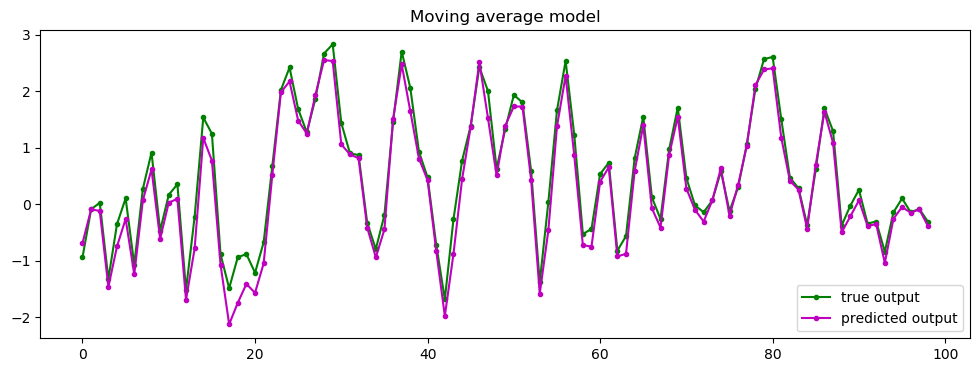


2-norm error: 2.4767439159452964


In [2]:
# generate A matrix. Using more width creates better fit (at some point with diminishing returns).  (MA model)
k = 3
# initialize A as a matrix of zeros with T rows and k columns
A = zeros(T,k)

# in each row, the entries are most recent input, second-most recent input, ...
# we need to do some fancy things with the first few rows 
# e.g., when i=1: A[1:end,1] is the whole first column of A. It should contain [u[1], u[2],...u[T]].
# e.g.2, when i=2: A[2:end,2] is a zero in A[1,2] followed by the rest of the 
# second column of A. It should contain [0, u[2],u[1],...u[T]-1].
# etc.
for i = 1:k
    A[i:end,i] = u[1:end-i+1]
end
# we can find the optimal weights with the backslash operator
wopt = A\y
# find what the outputs "should" be based on those weights
yest = A*wopt

# plot the calculated outputs vs. the observed outputs 
figure(figsize=(12,4))
plot(y,"g.-",yest,"m.-")
legend(["true output", "predicted output"], loc="lower right");
title("Moving average model");
println()
using LinearAlgebra
# also calculate the 2-norm error
println("2-norm error: ", norm(yest-y))